## Propabilidade

--------------------------------------------------------------------------------------------------------------------------------------

In [62]:
import enum, random, math
import matplotlib.pyplot as plt
from collections import Counter

Exemplo da família com dois filhos desconhecidos

* É igualmente possível que cada criança seja menino ou menina
* O gênero da segunda criança é independente do gênero da primeira

Logo, P(nenhuma menina) = 1/4 ; P(nenhum menino) = 1/4 ; P(um menino e uma menina) = 1/2

Evento "duas meninas"(B) condicionada pelo evento "pelo menos uma das crianças é menina"(L):
    P(B|L) = P(B,L)/P(L) = P(B)/P(L) = 1/3

Se há apenas a informação de que pelo menos uma das crianças é menina, então é duas vezes mais provável que a família tenha um menino e uma menina do que duas meninas. 

In [79]:
# Enum é um conjunto tipado de valores enumerados que deixa o código mais descritivo e legível

class Crianca(enum.Enum):
    BOY = 0
    GIRL = 1

def random_Crianca() ->Crianca:
    return random.choice([Crianca.BOY, Crianca.GIRL])

duas_meninas = 0
velha_menina = 0
alguma_menina = 0

random.seed(0)

for _ in range(10000):
    younger = random_Crianca()
    older = random_Crianca()

    if older == Crianca.GIRL:
        velha_menina +=1
    if older == Crianca.GIRL and younger == Crianca.GIRL:
        duas_meninas +=1
    if older == Crianca.GIRL or younger == Crianca.GIRL:
        alguma_menina +=1

print("P(ambas | velha):", duas_meninas/velha_menina)
print("P(ambas | alguma):", duas_meninas/alguma_menina)

P(ambas | velha): 0.5007089325501317
P(ambas | alguma): 0.3311897106109325


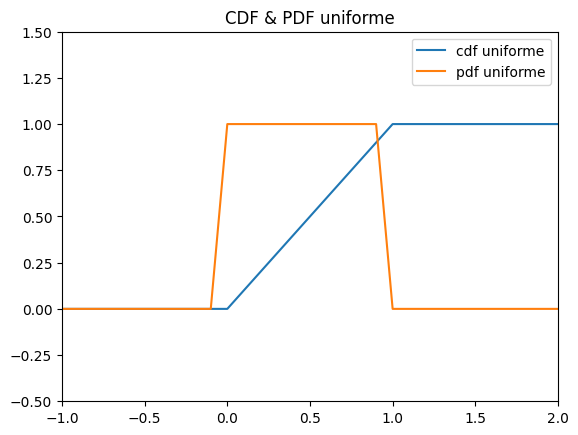

In [45]:
# Destribuições contínuas 

def uniform_pdf(x: float) -> float: # função de densidade de probabilidade (pdf)
    return 1 if 0 <= x < 1 else 0

def uniform_cdf(x: float) -> float: # função de distribuição cumulativa (cdf)
    """Retorna a probabilidade de uma variável aleatória 
    uniforme se <= x"""
    if x < 0: return 0 # a aleatória uniforme nunca é menor que zero 
    if x < 1: return x # p.ex., P(X <= 0.4) = 0.4
    else: return 1     # a aleatória uniforme sempre é menor que 1 

xss = [x / 10.0 for x in range(-50, 50)]
plt.plot(xss, [uniform_cdf(x) for x in xss], label="cdf uniforme")
plt.plot(xss, [uniform_pdf(x) for x in xss], label= "pdf uniforme")
plt.title("CDF & PDF uniforme")
plt.axis([-1, 2, -0.5, 1.5])
plt.legend()
plt.show()

In [49]:
# Distribuição normal 

sqtr_two_pi = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    """Retorna a função de densidade de probabilidade"""
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqtr_two_pi * sigma))

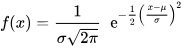

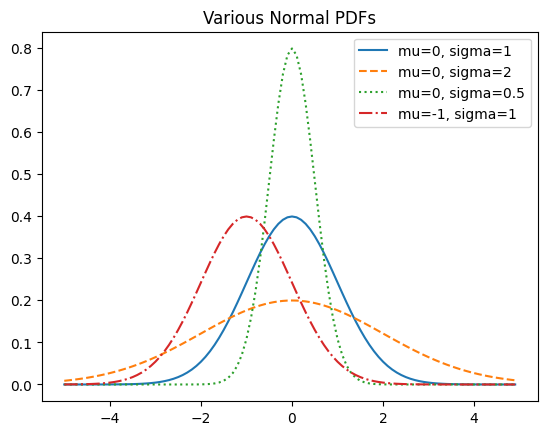

In [50]:
xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1') # distribuição normal padrão
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title('Various Normal PDFs')
plt.show()

In [46]:
# Normal cdf e inverse normal cdf

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p: float, mu: float = 0, sigma: float = 1, tolerance: float = 0.00001) -> float:
    """Encontre o inverso aproximado usando a pesquisa binária"""

    # se não for padrão, compute o padrão e redimensione
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0 # normal_cdf(-10) é muito próxima de 0
    hi_z = 10.0 # normal_cdf(10) é muito próxima de 1

    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # Considere o ponto médio
        mid_p = normal_cdf(mid_z)  # e o valor da CDF
        if mid_p < p:
            low_z = mid_z          # O ponto médio é muito baixo, procure um maior
        else: 
            hi_z = mid_z           # O ponto médio é muito alto, procure um menor

    return mid_z

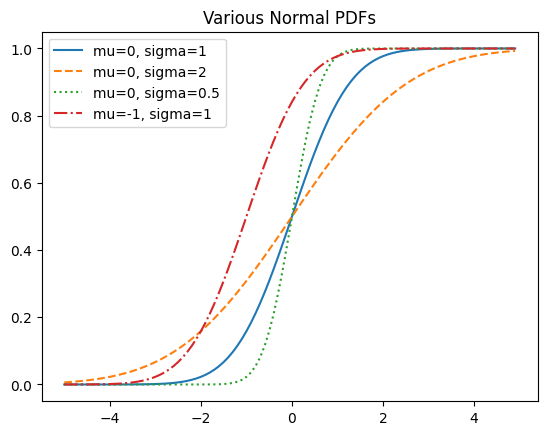

In [51]:
# Plotando a normal cdf

plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title('Various Normal PDFs')
plt.show()

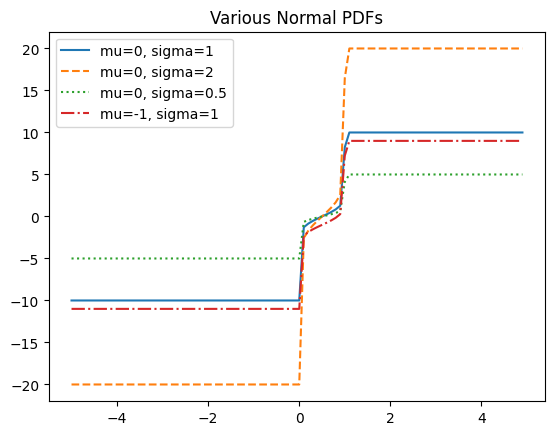

In [52]:
plt.plot(xs, [inverse_normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1') # distribuição normal padrão
plt.plot(xs, [inverse_normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [inverse_normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [inverse_normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title('Various Normal PDFs')
plt.show()

In [59]:
def bernoulli_trial(p: float) -> int:
    """Retorna 1 com probabilidade p e 0 com probabilidade 1 - p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Retorna a soma de n trials bernoulli(p)"""
    return sum(bernoulli_trial(p) for _ in range(n))

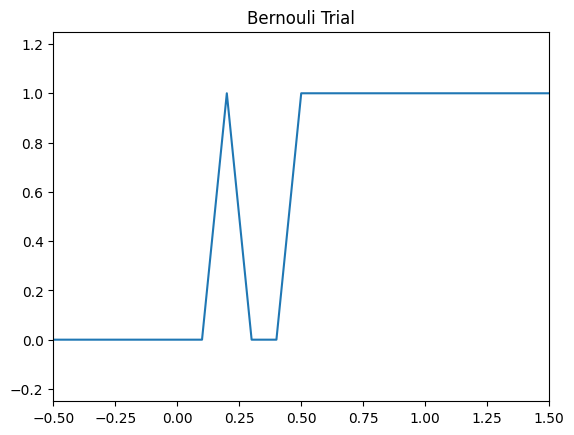

In [71]:
plt.plot(xs, [bernoulli_trial(x) for x in xs])
plt.title('Bernouli Trial')
plt.axis([-0.5, 1.5, -0.25, 1.25])
plt.show()

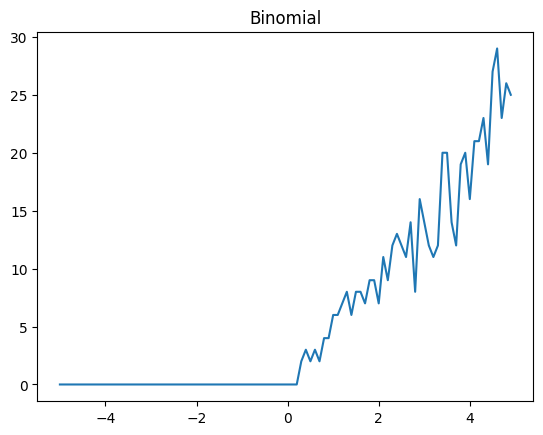

In [78]:
plt.plot(xs, [binomial(int(x*10), 0.5 ) for x in xs])
plt.title('Binomial')
plt.show()

In [82]:
# Teorema do limite central
def binomial_histograma(p: float, n: int, num_points: int, title: str) -> None:
    """Seleciona pontos de um Binomial(n,p) e plota seu histograma"""
    data = [binomial(n, p) for _ in range(num_points)]

    # Usando um gráfico de barras para indicar as amostras de binomiais
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color= '0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # Usando um gráfico de linhas para indicar a aproximação normal
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    
    plt.plot(xs, ys)
    plt.title(title)
    plt.show()

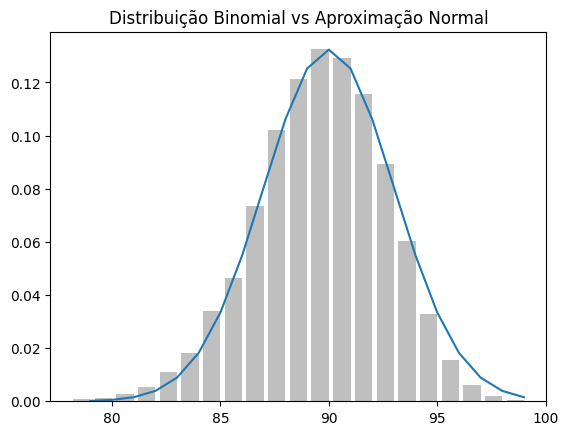

In [83]:
binomial_histograma(0.9, 100, 10000, "Distribuição Binomial vs Aproximação Normal")

#### Determinando a probabiliadade de cair 60 caras em 100 lançamentos de uma moeda 

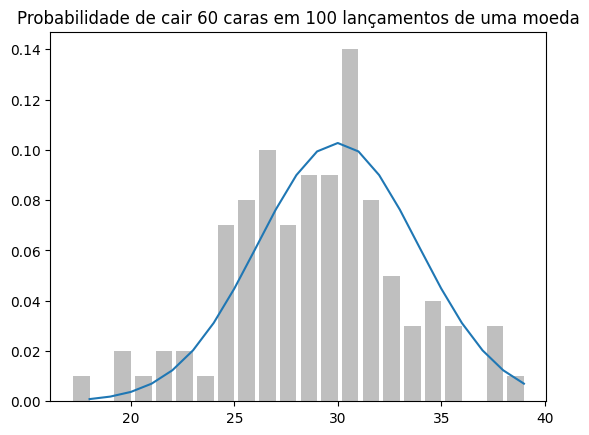

In [103]:
binomial_histograma(0.5, 60, 100, "Probabilidade de cair 60 caras em 100 lançamentos de uma moeda")